### Numerical_and_Textual_Analysis_of_Stock_Market_Prices

### Numerical Analysis

In [5]:
# import library
import pandas as pd

In [3]:
from google.colab import files, drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
# read data from google drive
df_news = pd.read_csv('/content/drive/MyDrive/india-news-headlines.csv')

In [6]:
# choose file from local
uploaded = files.upload()

Saving BSESN.csv to BSESN.csv


In [7]:
# change string value of date to pandas date time, read and store data in dataframe
df_prices = pd.read_csv('BSESN.csv', parse_dates = True)

In [8]:
df_prices.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,33103.238281,33103.238281,31276.300781,31390.070313,31390.070313,18100.0
1,2020-03-17,31611.570313,32047.980469,30394.939453,30579.089844,30579.089844,21500.0


In [10]:
df_prices.shape

(251, 7)

In [11]:
# to see null values
df_prices.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [12]:
# drop null values
df_prices.dropna(axis = 0, inplace = True)

In [13]:
# import library
import matplotlib.pyplot as plt

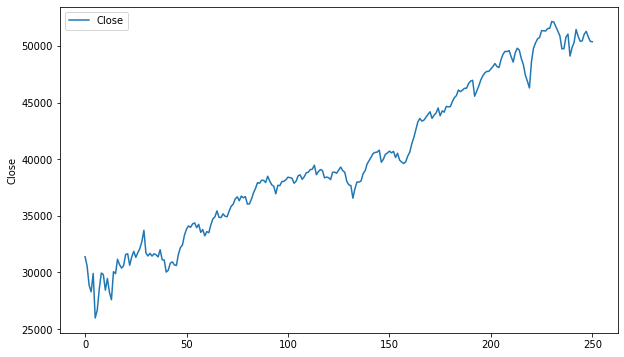

In [14]:
# to see close values in plot
plt.figure(figsize=(10, 6))
df_prices['Close'].plot()
plt.ylabel('Close')
plt.legend()
plt.show()

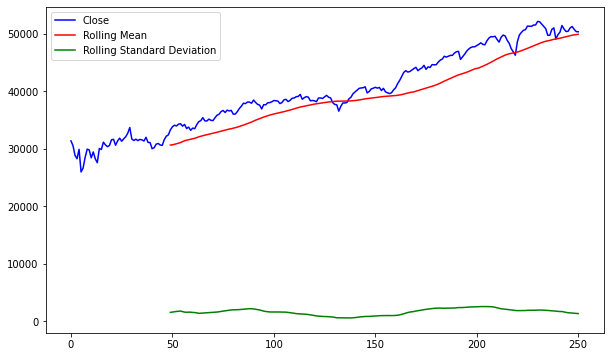

In [15]:
# to see close value, rolling mean and std deviation
close = df_prices['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df_prices['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(color = 'g', label = 'Rolling Standard Deviation')
plt.legend()

In [16]:
#split data to train and test
train = df_prices[:230]
test = df_prices[230:]

In [17]:
# create function to find rolling mean, std deviation and plot accordingly
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    plt.figure(figsize = (10,8))
    plt.plot(timeseries, color = 'b', label = 'original')
    plt.plot(rolmean, color = 'r', label = 'rolling mean')
    plt.plot(rolstd, color = 'k', label = 'rolling std')
    plt.xlabel('Date')
    plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
    plt.legend()
    plt.show()

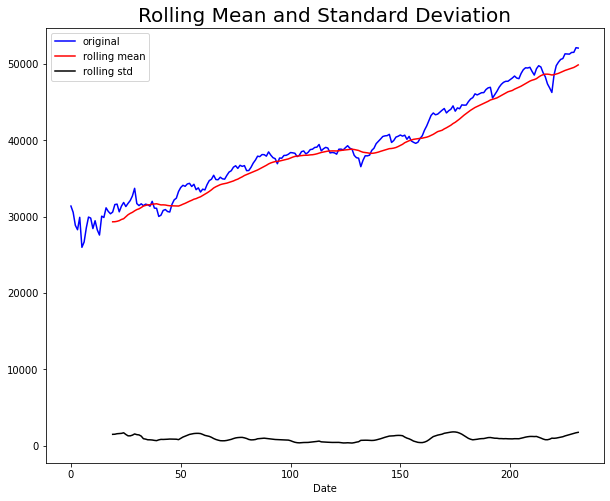

In [18]:
test_stationarity(train['Close'])

In [19]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [20]:
# create function to conduct augmented Dickey–Fuller test and print whether our data is stationary or not
def df_test(data):
    print('Results of dickey fuller test')
    result = adfuller(data, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")

In [21]:
df_test(df_prices['Close'])

Results of dickey fuller test
ADF Test Statistic : -0.45819066578653916
p-value : 0.8999203361659477
#Lags Used : 0
Number of Observations Used : 248
Weak evidence against null hypothesis, time series is non-stationary 


In [22]:
# import library
import numpy as np

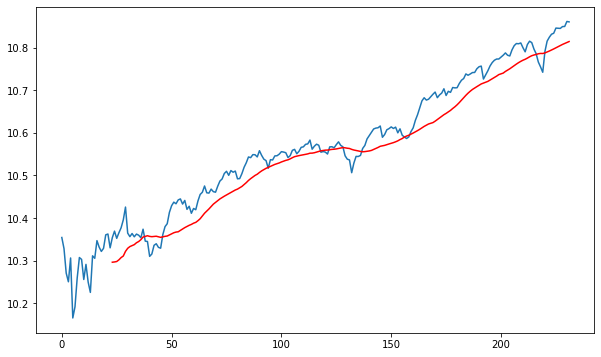

In [23]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

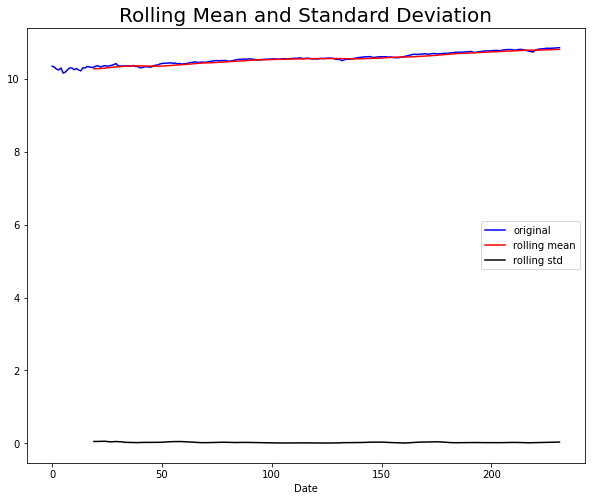

In [24]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

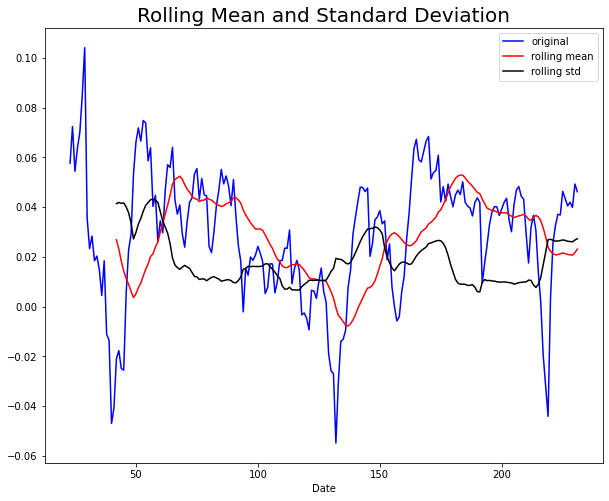

In [25]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [26]:
df_test(train_log_diff)

Results of dickey fuller test
ADF Test Statistic : -4.05903947375114
p-value : 0.0011310369255770406
#Lags Used : 2
Number of Observations Used : 204
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [27]:
# install pmdarima
pip install pmdarima

In [28]:
from pmdarima import auto_arima

In [29]:
# create model and do predictions
model = auto_arima(train_log, trace = True, error_action = 'ignore')
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1155.131, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1156.505, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1157.569, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1154.127, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1158.460, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1156.751, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1158.039, Time=0.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1158.890, Time=0.47 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1157.011, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1156.147, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1155.192, Time=0.15 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 4.110 seconds


Text(0, 0.5, 'Actual Stock Price')

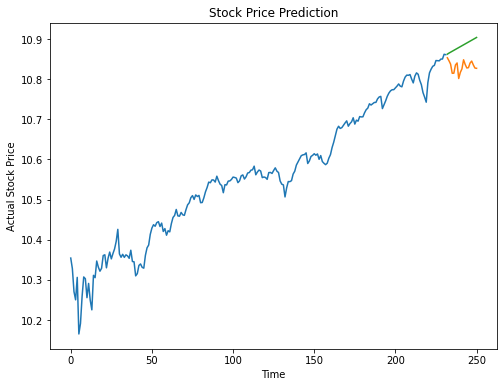

In [30]:
plt.figure(figsize = (8, 6))
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [31]:
# import library
from sklearn.metrics import mean_squared_error

In [32]:
# find mean squared error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.05468218944511529


## TEXTUAL ANALYSIS

In [33]:
df_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [34]:
# change column names
df_news.rename(columns={'publish_date':'Date', 'headline_category' : 'category', 'headline_text' :'news'}, inplace= True)

In [35]:
# change date string to pandas date time
df_news['Date'] = pd.to_datetime(df_news['Date'], format= '%Y%m%d')

In [36]:
df_news.head()

,Date,category,news
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [37]:
# drop category column
df_news.drop(['category'], axis = 1, inplace = True)

In [38]:
df_news.head()

,Date,news
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [39]:
# group news based on date and dropo duplicates
df_news['news'] = df_news.groupby(['Date']).transform(lambda x:' '.join(x))
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,news
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [40]:
# import libraries
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [41]:
lem = WordNetLemmatizer()

In [42]:
import nltk

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [45]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [46]:
# data preprocessing, clean the data
corpus = []
for i in range(0,len(df_news['news'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['news'][i])
    news = news.lower()
    news = news.split()
    news = [lem.lemmatize(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    corpus.append(news)

In [47]:
# replace cleaned data with old one
df_news['news'] = pd.Series(corpus)
df_news.head()

,Date,news
0,2001-01-02,status quo disturbed ayodhya say vajpayee fiss...
1,2001-01-03,powerless north india grope dark think laxman ...
2,2001-01-04,string pulled stephen hawking india vajpayee g...
3,2001-01-05,light combat craft take india club class hawki...
4,2001-01-06,light combat craft take india club class hawki...


In [48]:
# create functions to get subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [49]:
df_news['Subjectivity'] = df_news['news'].apply(getSubjectivity)
df_news['Polarity'] = df_news['news'].apply(getPolarity)
df_news

,Date,news,Subjectivity,Polarity
0,2001-01-02,status quo disturbed ayodhya say vajpayee fiss...,0.269097,0.113889
1,2001-01-03,powerless north india grope dark think laxman ...,0.438462,0.065385
2,2001-01-04,string pulled stephen hawking india vajpayee g...,0.441656,0.073923
3,2001-01-05,light combat craft take india club class hawki...,0.481766,0.268495
4,2001-01-06,light combat craft take india club class hawki...,0.439394,0.248485
...,...,...,...,...
7257,2020-12-27,biginterview dhritiman chatterjee nobody dare ...,0.381851,0.031572
7258,2020-12-28,horoscope today december check astrological pr...,0.402013,0.044307
7259,2020-12-29,man recovers charred remains thief burnt shop ...,0.406426,0.048478
7260,2020-12-30,numerology reading december prediction lucky c...,0.438293,0.037805


In [50]:
# using sentimentintensityanalyzer
sa = SentimentIntensityAnalyzer()

df_news['Compound'] = [sa.polarity_scores(v)['compound'] for v in df_news['news']]
df_news['Negative'] = [sa.polarity_scores(v)['neg'] for v in df_news['news']]
df_news['Neutral'] = [sa.polarity_scores(v)['neu'] for v in df_news['news']]
df_news['Positive'] = [sa.polarity_scores(v)['pos'] for v in df_news['news']]
df_news

,Date,news,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,status quo disturbed ayodhya say vajpayee fiss...,0.269097,0.113889,-0.9276,0.156,0.726,0.119
1,2001-01-03,powerless north india grope dark think laxman ...,0.438462,0.065385,-0.6908,0.174,0.678,0.148
2,2001-01-04,string pulled stephen hawking india vajpayee g...,0.441656,0.073923,0.8126,0.131,0.735,0.135
3,2001-01-05,light combat craft take india club class hawki...,0.481766,0.268495,0.9468,0.176,0.628,0.196
4,2001-01-06,light combat craft take india club class hawki...,0.439394,0.248485,-0.8316,0.231,0.628,0.142
...,...,...,...,...,...,...,...,...
7257,2020-12-27,biginterview dhritiman chatterjee nobody dare ...,0.381851,0.031572,-0.9998,0.168,0.724,0.109
7258,2020-12-28,horoscope today december check astrological pr...,0.402013,0.044307,-0.9996,0.149,0.742,0.109
7259,2020-12-29,man recovers charred remains thief burnt shop ...,0.406426,0.048478,-0.9998,0.166,0.727,0.108
7260,2020-12-30,numerology reading december prediction lucky c...,0.438293,0.037805,-0.9999,0.177,0.722,0.100


In [51]:
df_news.head(1)

,Date,news,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,status quo disturbed ayodhya say vajpayee fiss...,0.269097,0.113889,-0.9276,0.156,0.726,0.119


In [52]:
df_prices.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,33103.238281,33103.238281,31276.300781,31390.070313,31390.070313,18100.0


In [53]:
# merge two dataframe into one
df_complete = pd.merge(df_prices, df_news, how='inner', on='Date')
df_complete

,Date,Open,High,Low,Close,Adj Close,Volume,news,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-03-16,33103.238281,33103.238281,31276.300781,31390.070313,31390.070313,18100.0,ode tawaifs bollywood whats ultimate hand wash...,0.336077,0.003018,-0.9999,0.207,0.721,0.073
1,2020-03-17,31611.570313,32047.980469,30394.939453,30579.089844,30579.089844,21500.0,two taken preventive custody spreading covid r...,0.355393,0.026576,-0.9999,0.212,0.706,0.082
2,2020-03-18,30968.839844,31101.769531,28613.050781,28869.509766,28869.509766,31300.0,fda warns charging excess mask sanitisers shar...,0.360892,0.047621,-0.9999,0.186,0.737,0.077
3,2020-03-19,27773.359375,29370.529297,26714.460938,28288.230469,28288.230469,33200.0,daily wage sanitary worker terminated shoot co...,0.350654,0.022564,-0.9999,0.183,0.748,0.070
4,2020-03-20,28460.820313,30418.199219,27932.669922,29915.960938,29915.960938,32100.0,woman test negative watch auragabad positive c...,0.360971,0.022494,-0.9999,0.185,0.743,0.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2020-12-24,46743.488281,47053.398438,46539.019531,46973.539063,46973.539063,13700.0,set mood sex cold winter two house blow gujara...,0.375610,0.051090,-0.9995,0.151,0.737,0.112
195,2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600.0,horoscope today december check astrological pr...,0.402013,0.044307,-0.9996,0.149,0.742,0.109
196,2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800.0,man recovers charred remains thief burnt shop ...,0.406426,0.048478,-0.9998,0.166,0.727,0.108
197,2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0,numerology reading december prediction lucky c...,0.438293,0.037805,-0.9999,0.177,0.722,0.100


In [54]:
# seperate particular columns we wanted
df = df_complete[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,31390.070313,0.336077,0.003018,-0.9999,0.207,0.721,0.073
1,30579.089844,0.355393,0.026576,-0.9999,0.212,0.706,0.082
2,28869.509766,0.360892,0.047621,-0.9999,0.186,0.737,0.077
3,28288.230469,0.350654,0.022564,-0.9999,0.183,0.748,0.070
4,29915.960938,0.360971,0.022494,-0.9999,0.185,0.743,0.073
...,...,...,...,...,...,...,...
194,46973.539063,0.375610,0.051090,-0.9995,0.151,0.737,0.112
195,47353.750000,0.402013,0.044307,-0.9996,0.149,0.742,0.109
196,47613.078125,0.406426,0.048478,-0.9998,0.166,0.727,0.108
197,47746.218750,0.438293,0.037805,-0.9999,0.177,0.722,0.100


In [55]:
X = df.drop(['Close'], axis = 1).copy()
y = df['Close'].copy()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor()

In [60]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [61]:
pred = rf.predict(X_test)

In [64]:
y_test[:10]

18     30379.810547
169    44180.050781
106    38614.789063
92     37736.070313
176    44149.718750
183    46103.500000
5      25981.240234
139    39574.570313
12     28265.310547
160    40616.140625
Name: Close, dtype: float64

In [65]:
pred[:10]

array([31769.94509758, 36429.47035179, 38274.73726595, 39471.47513698,
       41162.30664068, 38644.30628905, 33660.09775393, 39328.41943373,
       32014.42720699, 36012.41154308])

In [67]:
# to see mean squared error
print(f'Mean squared error :{mean_squared_error(pred, y_test)}')

Mean squared error :21891608.50376498


Mean squared error too high so we will use minmaxsaler

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.248452,0.090094,0.058179,0.0,0.938272,0.337662,0.038961
1,0.211200,0.262040,0.327230,0.0,1.000000,0.142857,0.155844
2,0.132671,0.310990,0.567585,0.0,0.679012,0.545455,0.090909
3,0.105971,0.219850,0.281419,0.0,0.641975,0.688312,0.000000
4,0.180740,0.311692,0.280613,0.0,0.666667,0.623377,0.038961


In [70]:
X = new_df.drop(['Close'], axis = 1)
y = new_df['Close']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [72]:
rf_model = RandomForestRegressor()

In [73]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [74]:
predictions = rf_model.predict(X_test)

In [75]:
mean_squared_error(y_test, predictions)

0.05001698571111808

Mean squared error is 0.05001698571111808